Install and Import Necessary Libraries

In [ ]:
# Install yfinance if it's not installed
!pip install yfinance

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np

# Ignore warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

print("✅ Libraries installed and imported successfully!")


✅ Libraries installed and imported successfully!


1.2 Fetch Stock Market Data
📌 Now, we will collect 6 months of daily stock price data for five major companies:

Apple (AAPL)
Google (GOOGL)
Amazon (AMZN)
Microsoft (MSFT)
Tesla (TSLA)

In [ ]:
# Define the list of company stock symbols
companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']

# Define time period and interval
time_period = "6mo"  # Last 6 months
interval = "1d"  # Daily data

# Dictionary to store the stock data
stock_data = {}

# Fetch stock data for each company
for company in companies:
    print(f"Fetching data for {company}...")  # Progress update
    stock_data[company] = yf.download(company, period=time_period, interval=interval)

print("✅ Data collection completed!")


Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for GOOGL...



[*********************100%***********************]  1 of 1 completed


Fetching data for AMZN...
Fetching data for MSFT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for TSLA...
✅ Data collection completed!


1.3 Preview the Data
📌 Let's print the first few rows of Apple's stock data to check if everything looks fine.

In [ ]:
# Display the first 5 rows of Apple (AAPL) stock data
print("📊 Apple (AAPL) Stock Data:")
stock_data['AAPL'].head()


📊 Apple (AAPL) Stock Data:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-08-01,217.867844,223.974045,216.530867,223.864292,62501000
2024-08-02,219.364456,225.091524,217.219308,218.656050,105568600
2024-08-05,208.798340,213.018802,195.558244,198.641276,119548600
2024-08-06,206.762924,209.516713,200.616820,204.837281,69660500
2024-08-07,209.347107,213.158489,205.924830,206.433675,63516400


1.4 Data Cleaning & Preprocessing
📌 We will now clean the data:

Remove missing values
Convert index to datetime
Resample the data (convert daily to weekly average price for trend analysis)

In [ ]:
# Function to clean stock data
def clean_stock_data(df):
    # Drop missing values
    df.dropna(inplace=True)

    # Convert index to datetime format
    df.index = pd.to_datetime(df.index)

    # Use "Adj Close" if available, otherwise use "Close"
    column_to_use = "Adj Close" if "Adj Close" in df.columns else "Close"

    # Resample data to weekly averages
    df_weekly = df[column_to_use].resample('W').mean()

    return df_weekly

# Clean and process stock data for all companies
cleaned_stock_data = {company: clean_stock_data(stock_data[company]) for company in companies}

print("✅ Data cleaned successfully!")


✅ Data cleaned successfully!


1.5 Preview Cleaned Data
📌 Let’s check how the cleaned stock data looks.

In [ ]:
# Print cleaned Apple stock data
print("📊 Cleaned Apple Stock Data (Weekly Averages):")
print(cleaned_stock_data['AAPL'].head())

📊 Cleaned Apple Stock Data (Weekly Averages):
Ticker            AAPL
Date                  
2024-08-04  218.616150
2024-08-11  210.698047
2024-08-18  222.013742
2024-08-25  225.785590
2024-09-01  227.847321


1.6 Save Cleaned Data as CSV for Power BI
📌 Power BI works best with CSV files, so let's save our cleaned dataset for each company.

In [ ]:
# Save cleaned weekly stock data for each company
for company in companies:
    cleaned_stock_data[company].to_csv(f'{company}_weekly_stock.csv')

print("✅ Cleaned stock data saved as CSV files!")


✅ Cleaned stock data saved as CSV files!


**Step 2: Data Analysis & Business Research **

🔹 Step 2.1: Exploratory Data Analysis (EDA)
📌 Let's start by checking summary statistics and visualizing stock price trends.

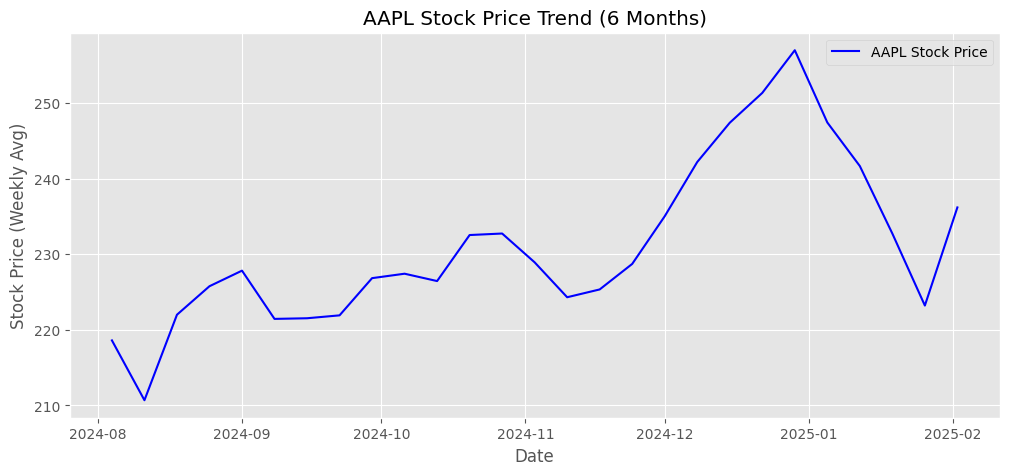

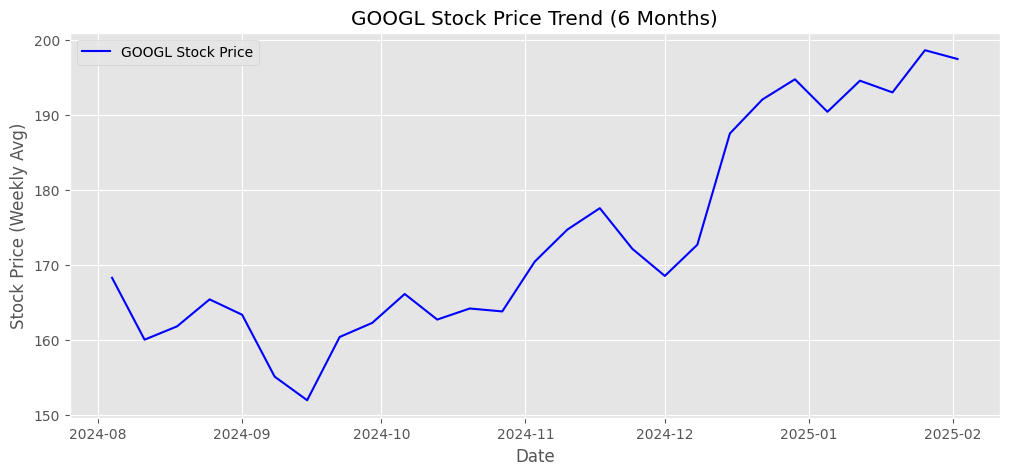

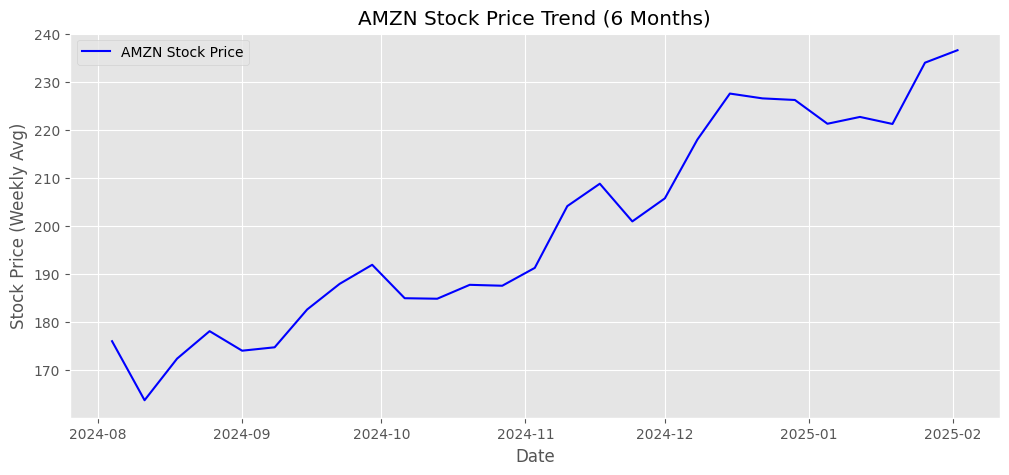

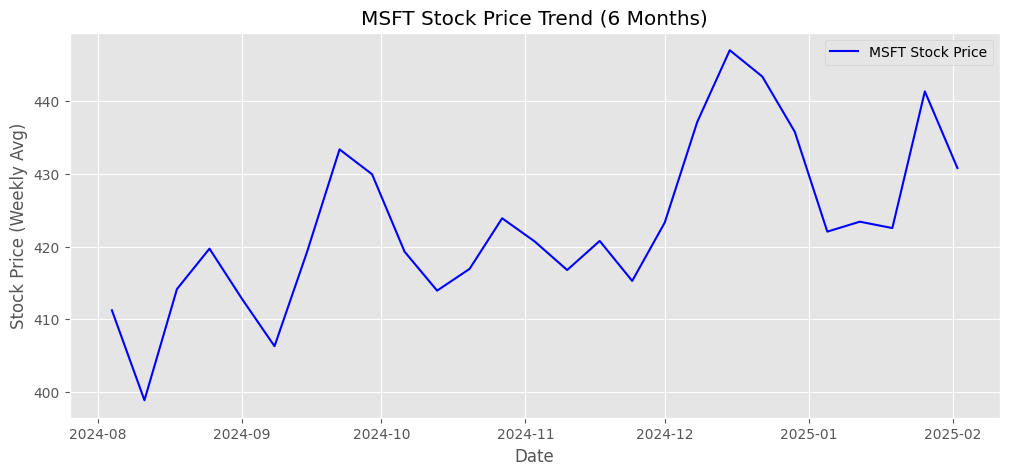

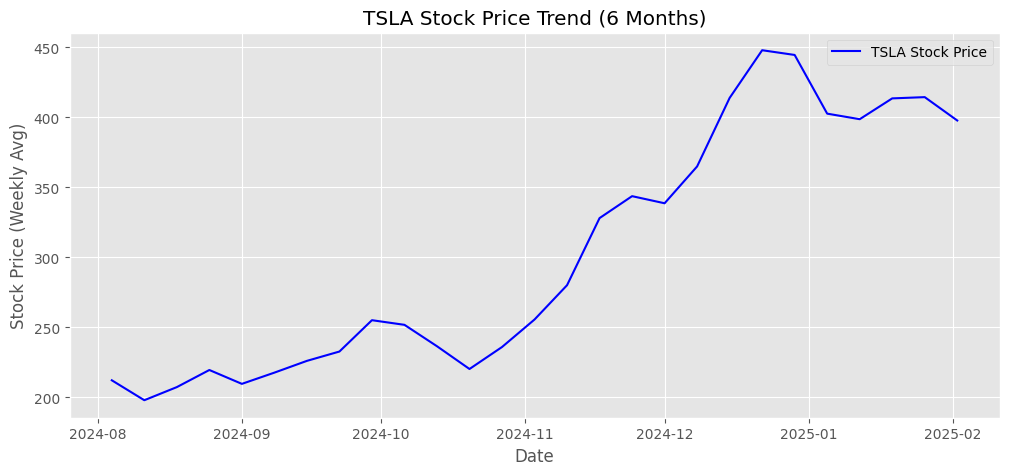

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid Matplotlib style
plt.style.use("ggplot")  # Alternative: 'fivethirtyeight', 'classic', 'bmh'

# Define a function to plot stock prices
def plot_stock_prices(data, company):
    plt.figure(figsize=(12, 5))
    plt.plot(data, label=f"{company} Stock Price", color='blue')
    plt.title(f"{company} Stock Price Trend (6 Months)")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (Weekly Avg)")
    plt.legend()
    plt.show()

# Plot stock prices for all companies
for company in companies:
    plot_stock_prices(cleaned_stock_data[company], company)


🔹 Step 2.2: Moving Averages (Trend Analysis)
📌 Moving averages help us understand stock trends over time.



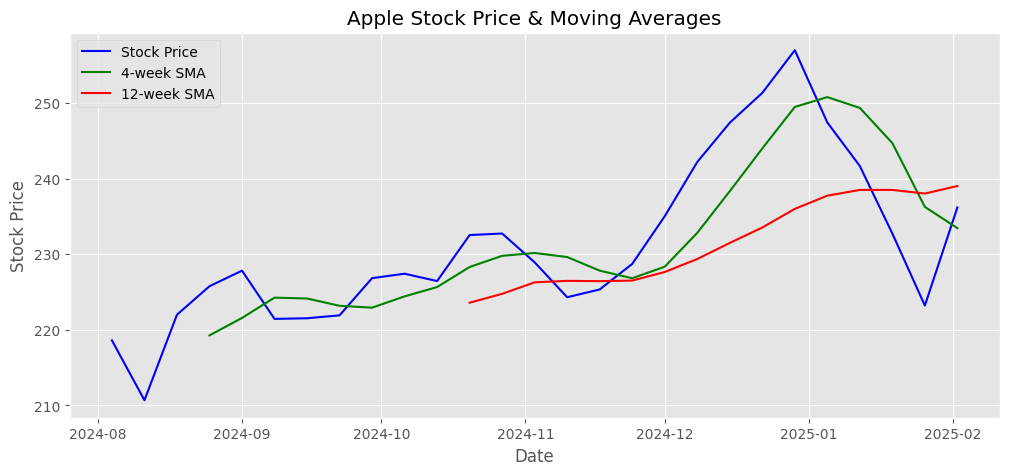

In [ ]:
# Function to calculate moving averages
def calculate_moving_averages(df, window_short=4, window_long=12):
    df_ma = pd.DataFrame(df)  # Convert to DataFrame

    # Short-term moving average (4-week SMA)
    df_ma['SMA_Short'] = df_ma.iloc[:, 0].rolling(window=window_short).mean()

    # Long-term moving average (12-week SMA)
    df_ma['SMA_Long'] = df_ma.iloc[:, 0].rolling(window=window_long).mean()

    return df_ma

# Apply moving averages for all companies
ma_stock_data = {company: calculate_moving_averages(cleaned_stock_data[company]) for company in companies}

# Plot moving averages for Apple
plt.figure(figsize=(12, 5))
plt.plot(ma_stock_data['AAPL'].iloc[:, 0], label="Stock Price", color='blue')
plt.plot(ma_stock_data['AAPL']['SMA_Short'], label="4-week SMA", color='green')
plt.plot(ma_stock_data['AAPL']['SMA_Long'], label="12-week SMA", color='red')
plt.title("Apple Stock Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


🔹 Step 2.3: Volatility & Risk Analysis
📌 Volatility measures how much a stock fluctuates, which helps understand risk.

In [ ]:
# Function to calculate daily returns and volatility
def calculate_volatility(df):
    df_returns = df.pct_change().dropna()  # Calculate % change (weekly returns)
    volatility = df_returns.std()  # Standard deviation (volatility)
    return df_returns, volatility

# Compute volatility for all companies
stock_volatility = {}
stock_returns = {}

for company in companies:
    stock_returns[company], stock_volatility[company] = calculate_volatility(cleaned_stock_data[company])

# Display volatility values (Extracting float value from Series)
print("📊 Stock Volatility (Higher = Riskier):")
for company, vol in stock_volatility.items():
    print(f"{company}: {vol.values[0]:.4f}")  # Extracting single value from Series


📊 Stock Volatility (Higher = Riskier):
AAPL: 0.0272
GOOGL: 0.0309
AMZN: 0.0331
MSFT: 0.0224
TSLA: 0.0668


🔹 Step 2.4: Stock Correlation Analysis
📌 Understanding correlations between stocks helps in portfolio diversification.

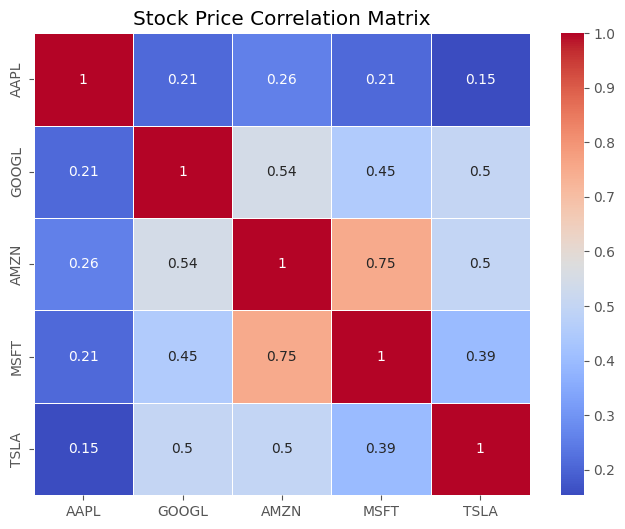

In [ ]:
# Combine all stock returns into one DataFrame
returns_df = pd.DataFrame({company: stock_returns[company].values.flatten() for company in companies},
                          index=stock_returns[companies[0]].index)

# Compute correlation matrix
correlation_matrix = returns_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stock Price Correlation Matrix")
plt.show()


🔹 Step 2.5: Forecasting Future Stock Prices
📌 We will use ARIMA (for short-term forecasting) and Prophet (for trend prediction).

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.1 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=172.127, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=173.687, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=173.651, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=170.441, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=175.651, Time=0.45 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.014 seconds


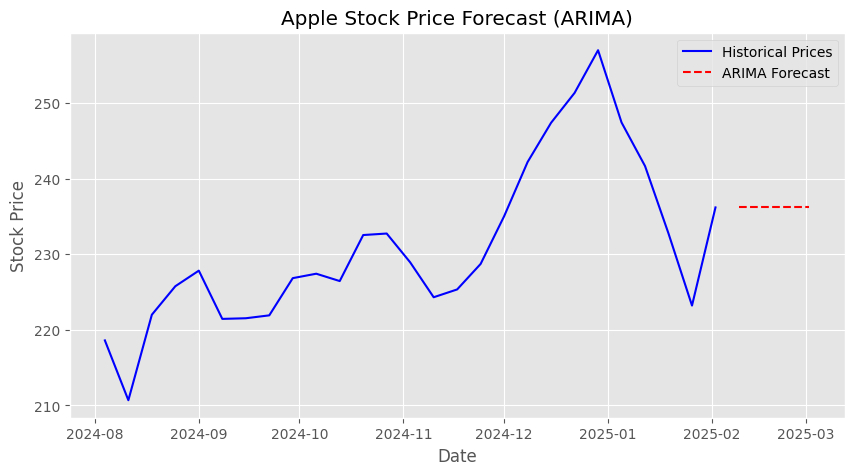

In [ ]:
# Install ARIMA
!pip install pmdarima

# Import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Define function to apply ARIMA forecasting
def forecast_arima(df, company):
    model = auto_arima(df, seasonal=False, trace=True)
    model_fit = ARIMA(df, order=model.order).fit()

    # Forecast for next 4 weeks
    forecast = model_fit.forecast(steps=4)

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(df, label="Historical Prices", color='blue')
    plt.plot(forecast, label="ARIMA Forecast", color='red', linestyle="dashed")
    plt.title(f"{company} Stock Price Forecast (ARIMA)")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Forecast for Apple
forecast_arima(cleaned_stock_data['AAPL'], "Apple")


Step 2.5.2: Prophet Model (Long-Term Forecasting)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphp3c3qi3/dfhrba66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphp3c3qi3/0yzb360m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28513', 'data', 'file=/tmp/tmphp3c3qi3/dfhrba66.json', 'init=/tmp/tmphp3c3qi3/0yzb360m.json', 'output', 'file=/tmp/tmphp3c3qi3/prophet_modelf6qbph5e/prophet_model-20250202114758.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:47:59 - cmdstanpy - INFO - Chain [1] start processing
I

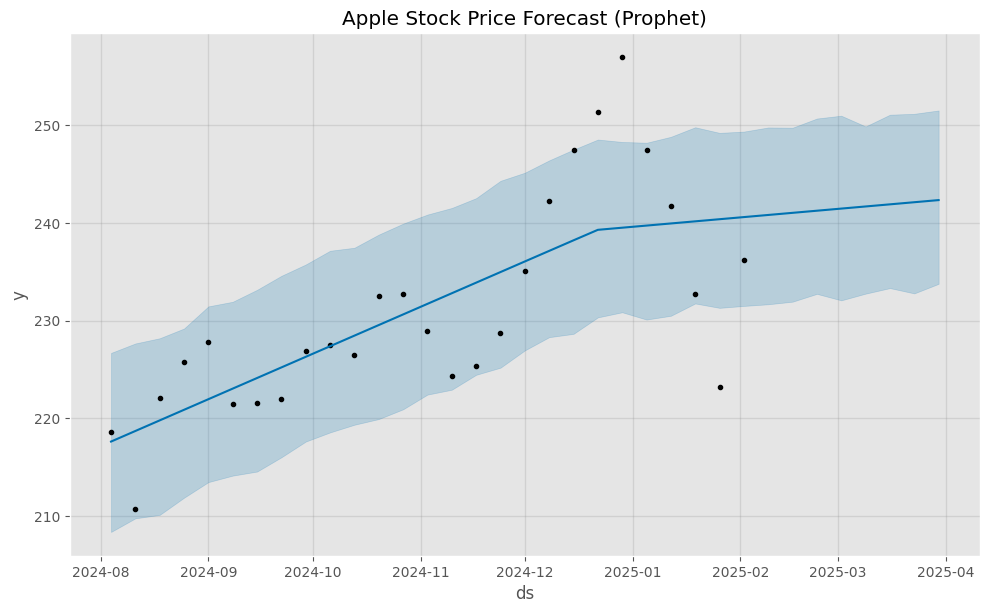

In [ ]:
# Install Prophet
!pip install prophet

# Import Prophet
from prophet import Prophet

# Prepare Data for Prophet
def prepare_prophet_data(df):
    df_prophet = df.reset_index()
    df_prophet.columns = ["ds", "y"]
    return df_prophet

# Forecast using Prophet
def forecast_prophet(df, company):
    df_prophet = prepare_prophet_data(df)

    # Define and fit model
    model = Prophet()
    model.fit(df_prophet)

    # Create future dates (8 weeks)
    future = model.make_future_dataframe(periods=8, freq='W')

    # Forecast
    forecast = model.predict(future)

    # Plot forecast
    model.plot(forecast)
    plt.title(f"{company} Stock Price Forecast (Prophet)")
    plt.show()

# Forecast for Apple
forecast_prophet(cleaned_stock_data['AAPL'], "Apple")


Stock Trend Analysis
Here’s how you can add technical analysis indicators like Moving Averages and Relative Strength Index (RSI) to your stock data.

Moving Averages (SMA, EMA)

In [ ]:
import pandas as pd

# Adding Simple Moving Average (SMA) and Exponential Moving Average (EMA) to the stock data
for company, data in stock_data.items():
    data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-period SMA
    data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()  # 50-period EMA

# Example: Check Apple stock data with SMA and EMA
print(stock_data['AAPL'][['Close', 'SMA_50', 'EMA_50']].head())


Price            Close SMA_50      EMA_50
Ticker            AAPL                   
Date                                     
2024-08-01  217.867844    NaN  217.867844
2024-08-02  219.364456    NaN  217.926534
2024-08-05  208.798340    NaN  217.568566
2024-08-06  206.762924    NaN  217.144815
2024-08-07  209.347107    NaN  216.839023


Relative Strength Index (RSI)

In [ ]:
def calculate_rsi(data, window=14):
    """Calculate the Relative Strength Index (RSI) for a stock."""
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Adding RSI to stock data
for company, data in stock_data.items():
    data['RSI'] = calculate_rsi(data)

# Example: Check Apple stock with RSI
print(stock_data['AAPL'][['Close', 'RSI']].tail())


Price            Close        RSI
Ticker            AAPL           
Date                             
2025-01-27  229.860001  35.613806
2025-01-28  238.259995  43.722049
2025-01-29  239.360001  47.259082
2025-01-30  237.589996  45.203679
2025-01-31  236.000000  49.132824


2.6 Visualization of Stock Trends
Use matplotlib to visualize stock prices with Moving Averages and RSI.

Stock Price & Moving Averages Plot

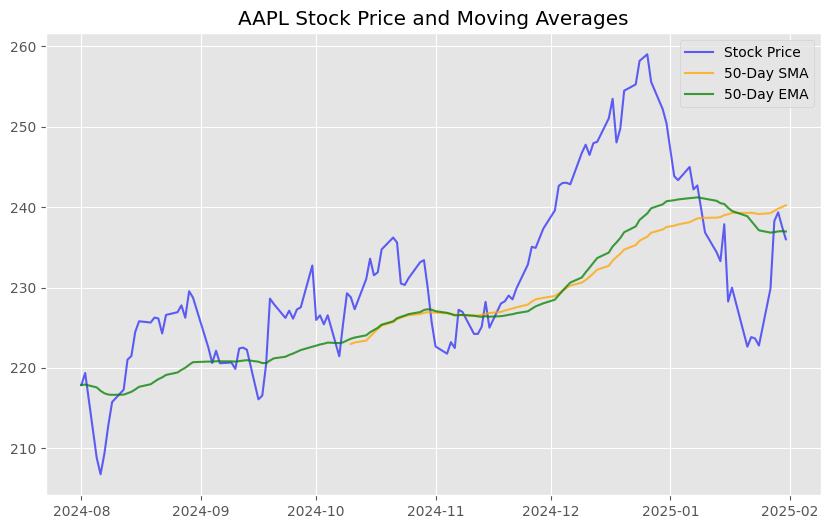

In [ ]:
import matplotlib.pyplot as plt

def plot_stock_data(company, data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Stock Price', color='blue', alpha=0.6)
    plt.plot(data['SMA_50'], label='50-Day SMA', color='orange', alpha=0.75)
    plt.plot(data['EMA_50'], label='50-Day EMA', color='green', alpha=0.75)
    plt.title(f'{company} Stock Price and Moving Averages')
    plt.legend()
    plt.show()

# Plot for Apple stock
plot_stock_data('AAPL', stock_data['AAPL'])


RSI Plot

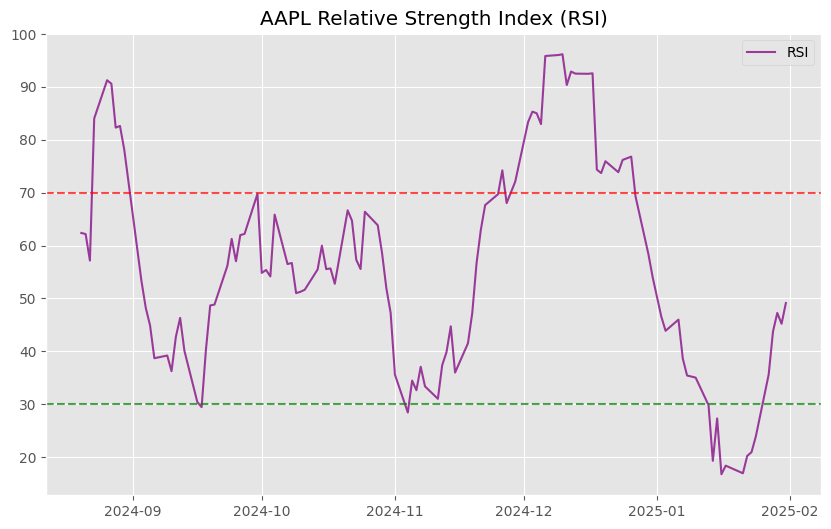

In [ ]:
def plot_rsi(company, data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['RSI'], label='RSI', color='purple', alpha=0.75)
    plt.axhline(70, color='red', linestyle='--', alpha=0.7)  # Overbought level
    plt.axhline(30, color='green', linestyle='--', alpha=0.7)  # Oversold level
    plt.title(f'{company} Relative Strength Index (RSI)')
    plt.legend()
    plt.show()

# Plot RSI for Apple
plot_rsi('AAPL', stock_data['AAPL'])


3. Competitor Insights - Market Cap Comparison
Here, you can add a simple visualization to compare the market capitalization of companies, assuming you can get data from Yahoo Finance.

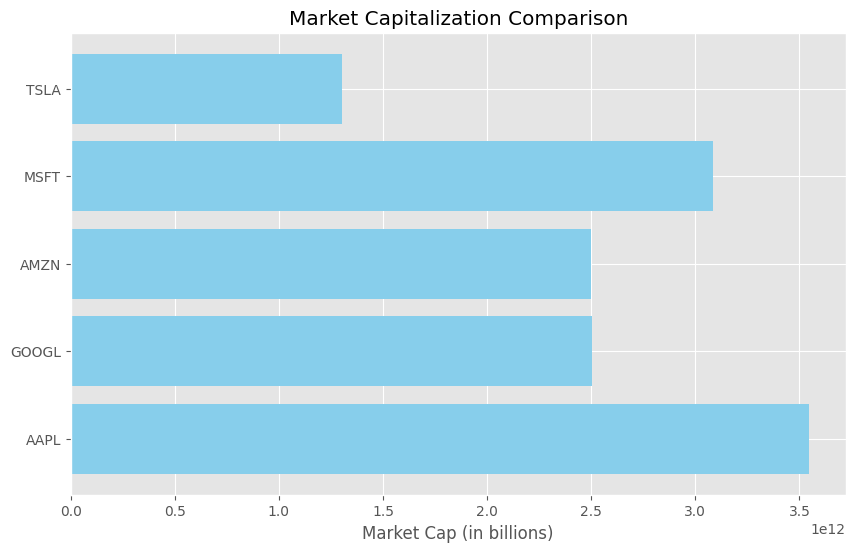

In [ ]:
import yfinance as yf

# Fetch market cap data
def get_market_cap(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info
    return info['marketCap']

# Fetch market caps for the companies
market_caps = {company: get_market_cap(company) for company in companies}

# Plot market cap comparison
def plot_market_caps(market_caps):
    companies = list(market_caps.keys())
    market_caps_values = list(market_caps.values())

    plt.figure(figsize=(10, 6))
    plt.barh(companies, market_caps_values, color='skyblue')
    plt.title('Market Capitalization Comparison')
    plt.xlabel('Market Cap (in billions)')
    plt.show()

# Plot market cap comparison for the companies
plot_market_caps(market_caps)


 Exporting Data to CSV
Once you’ve analyzed the data, it’s good practice to export the results for further review or sharing.

In [ ]:
# Export stock data to CSV for a specific company (e.g., AAPL)
stock_data['AAPL'].to_csv('AAPL_stock_data_with_indicators.csv')
